In [1]:

import time
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import sklearn as skl
import sklearn.model_selection as skl_m
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

%load_ext autoreload
%autoreload 2

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [9]:
#Load in the data
data_un = pd.read_csv('training_data.csv', sep = ',')
for key in data_un.keys():
    temp_col = pd.Categorical(data_un[key])
    data_un[key] = temp_col.codes

x_data = data_un.iloc[:,1:35]
y_data = data_un.iloc[:,35]

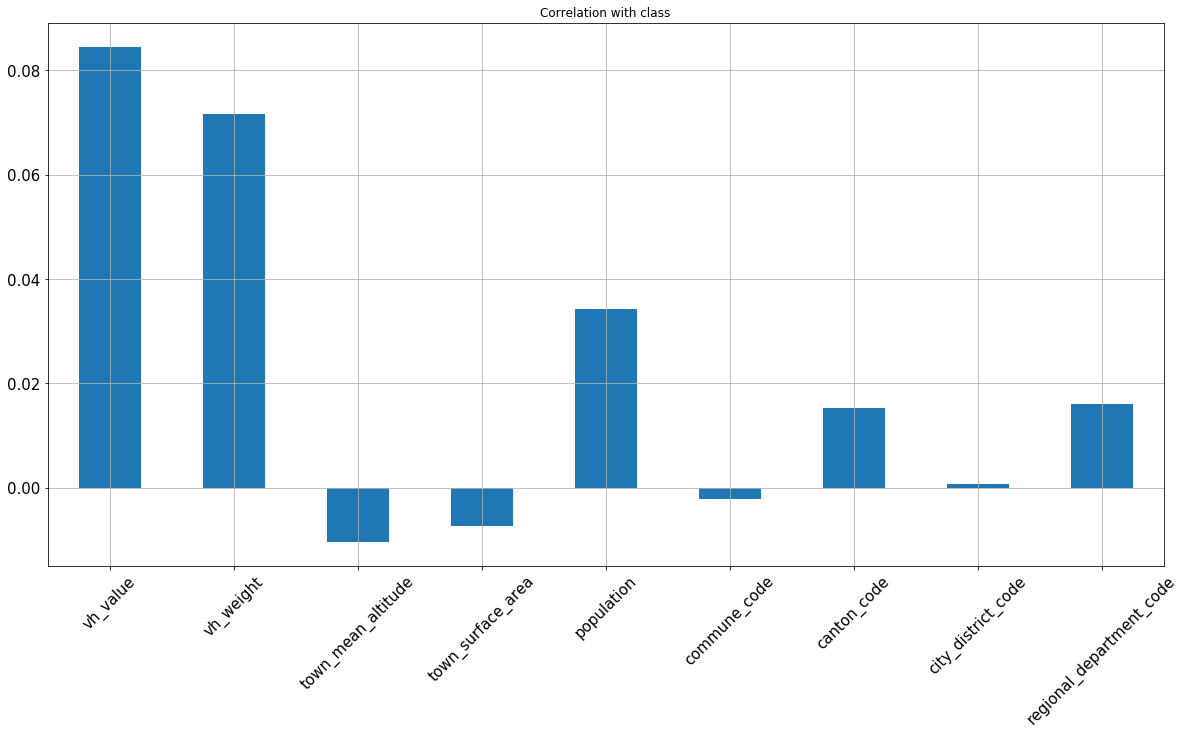

In [10]:
x_data.iloc[:,25:35].corrwith(y_data).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)


In [6]:
#feature scaling
mean_X = x_data.mean()
std_X = x_data.std()
x_data_n =(x_data-mean_X)/std_X

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_n, y_data, test_size = 0.3, random_state=0)

In [194]:
alpha = 0.001
def shallow_model():
    model = keras.Sequential([
        keras.layers.Dense(10, kernel_regularizer = keras.regularizers.l2(l = alpha), activation='tanh', input_shape=[X_train.shape[1]]),
        keras.layers.Dense(5, kernel_regularizer = keras.regularizers.l2(l = alpha), activation='tanh'),
        keras.layers.Dense(3, kernel_regularizer = keras.regularizers.l2(l = alpha), activation='tanh'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    
    return model

def linear_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='tanh', input_shape=[X_train.shape[1]]),
        keras.layers.Dense(5, activation='tanh'),
        keras.layers.Dense(3, activation='tanh'),
        keras.layers.Dense(1, activation = 'relu')
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    
    return model
shallow_model = shallow_model()

In [131]:
EPOCHS = 20

history_2 = shallow_model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, batch_size=32,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.8932,  loss:0.1136,  val_accuracy:0.9064,  val_loss:0.0902,  
....................

In [141]:
y_pred_shallow = shallow_model.predict(X_test)
y_pred_training = shallow_model.predict(X_train)

In [143]:
locations = np.where(y_test == 1)
locations_2 = np.where(y_train == 1)

In [144]:
print('Traini results')
print('mean of claimants: ', y_pred_shallow[locations_2].mean())
print('total mean: ',y_pred_shallow.mean())
print('Test results')
print('mean of claimants: ', y_pred_shallow[locations].mean())
print('total mean: ',y_pred_shallow.mean())

Training results
mean of claimants:  0.106368676
total mean:  0.09093305
Test results
mean of claimants:  0.1055389
total mean:  0.090844005


In [168]:
y_pred_shallow

array([[0.11268088],
       [0.12129071],
       [0.07047212],
       ...,
       [0.10221171],
       [0.0935717 ],
       [0.08260394]], dtype=float32)

In [147]:
np.array(y_test)[locations]

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [149]:
score = shallow_model.evaluate(X_test, y_test)
score

23826/23826 [==============================] - 1s 25us/sample - loss: 0.0822 - accuracy: 0.9083


[0.08220912127983937, 0.9082935]

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sn


In [185]:
y_nn_results = shallow_model.predict(x_data_n)
df1 = data_un.iloc[:,35]

In [186]:
locations_3= np.where(data_un.made_claim==1)

In [187]:
y_nn_results

array([[0.07609153],
       [0.11192006],
       [0.06295294],
       ...,
       [0.06025043],
       [0.09811389],
       [0.04695815]], dtype=float32)

In [188]:
average_claim = df1.mean()
sum_of_claims = df1.sum()

In [189]:
average_claim

250.25240493578443

In [191]:
((y_nn_results)*average_claim).sum()

1806767.6

In [192]:
sum_of_claims

19875046